In [150]:
import copy
import math as m
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [151]:
demo = pd.read_csv("Country.csv")
df = copy.deepcopy(demo)

In [152]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [154]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [155]:
df.set_index(['country'], inplace=True)

In [156]:
# numerical and categorical columns
num_cols = [cname for cname in df.columns if df[cname].dtype!="O"]
cat_cols = [cname for cname in df.columns if cname not in num_cols]

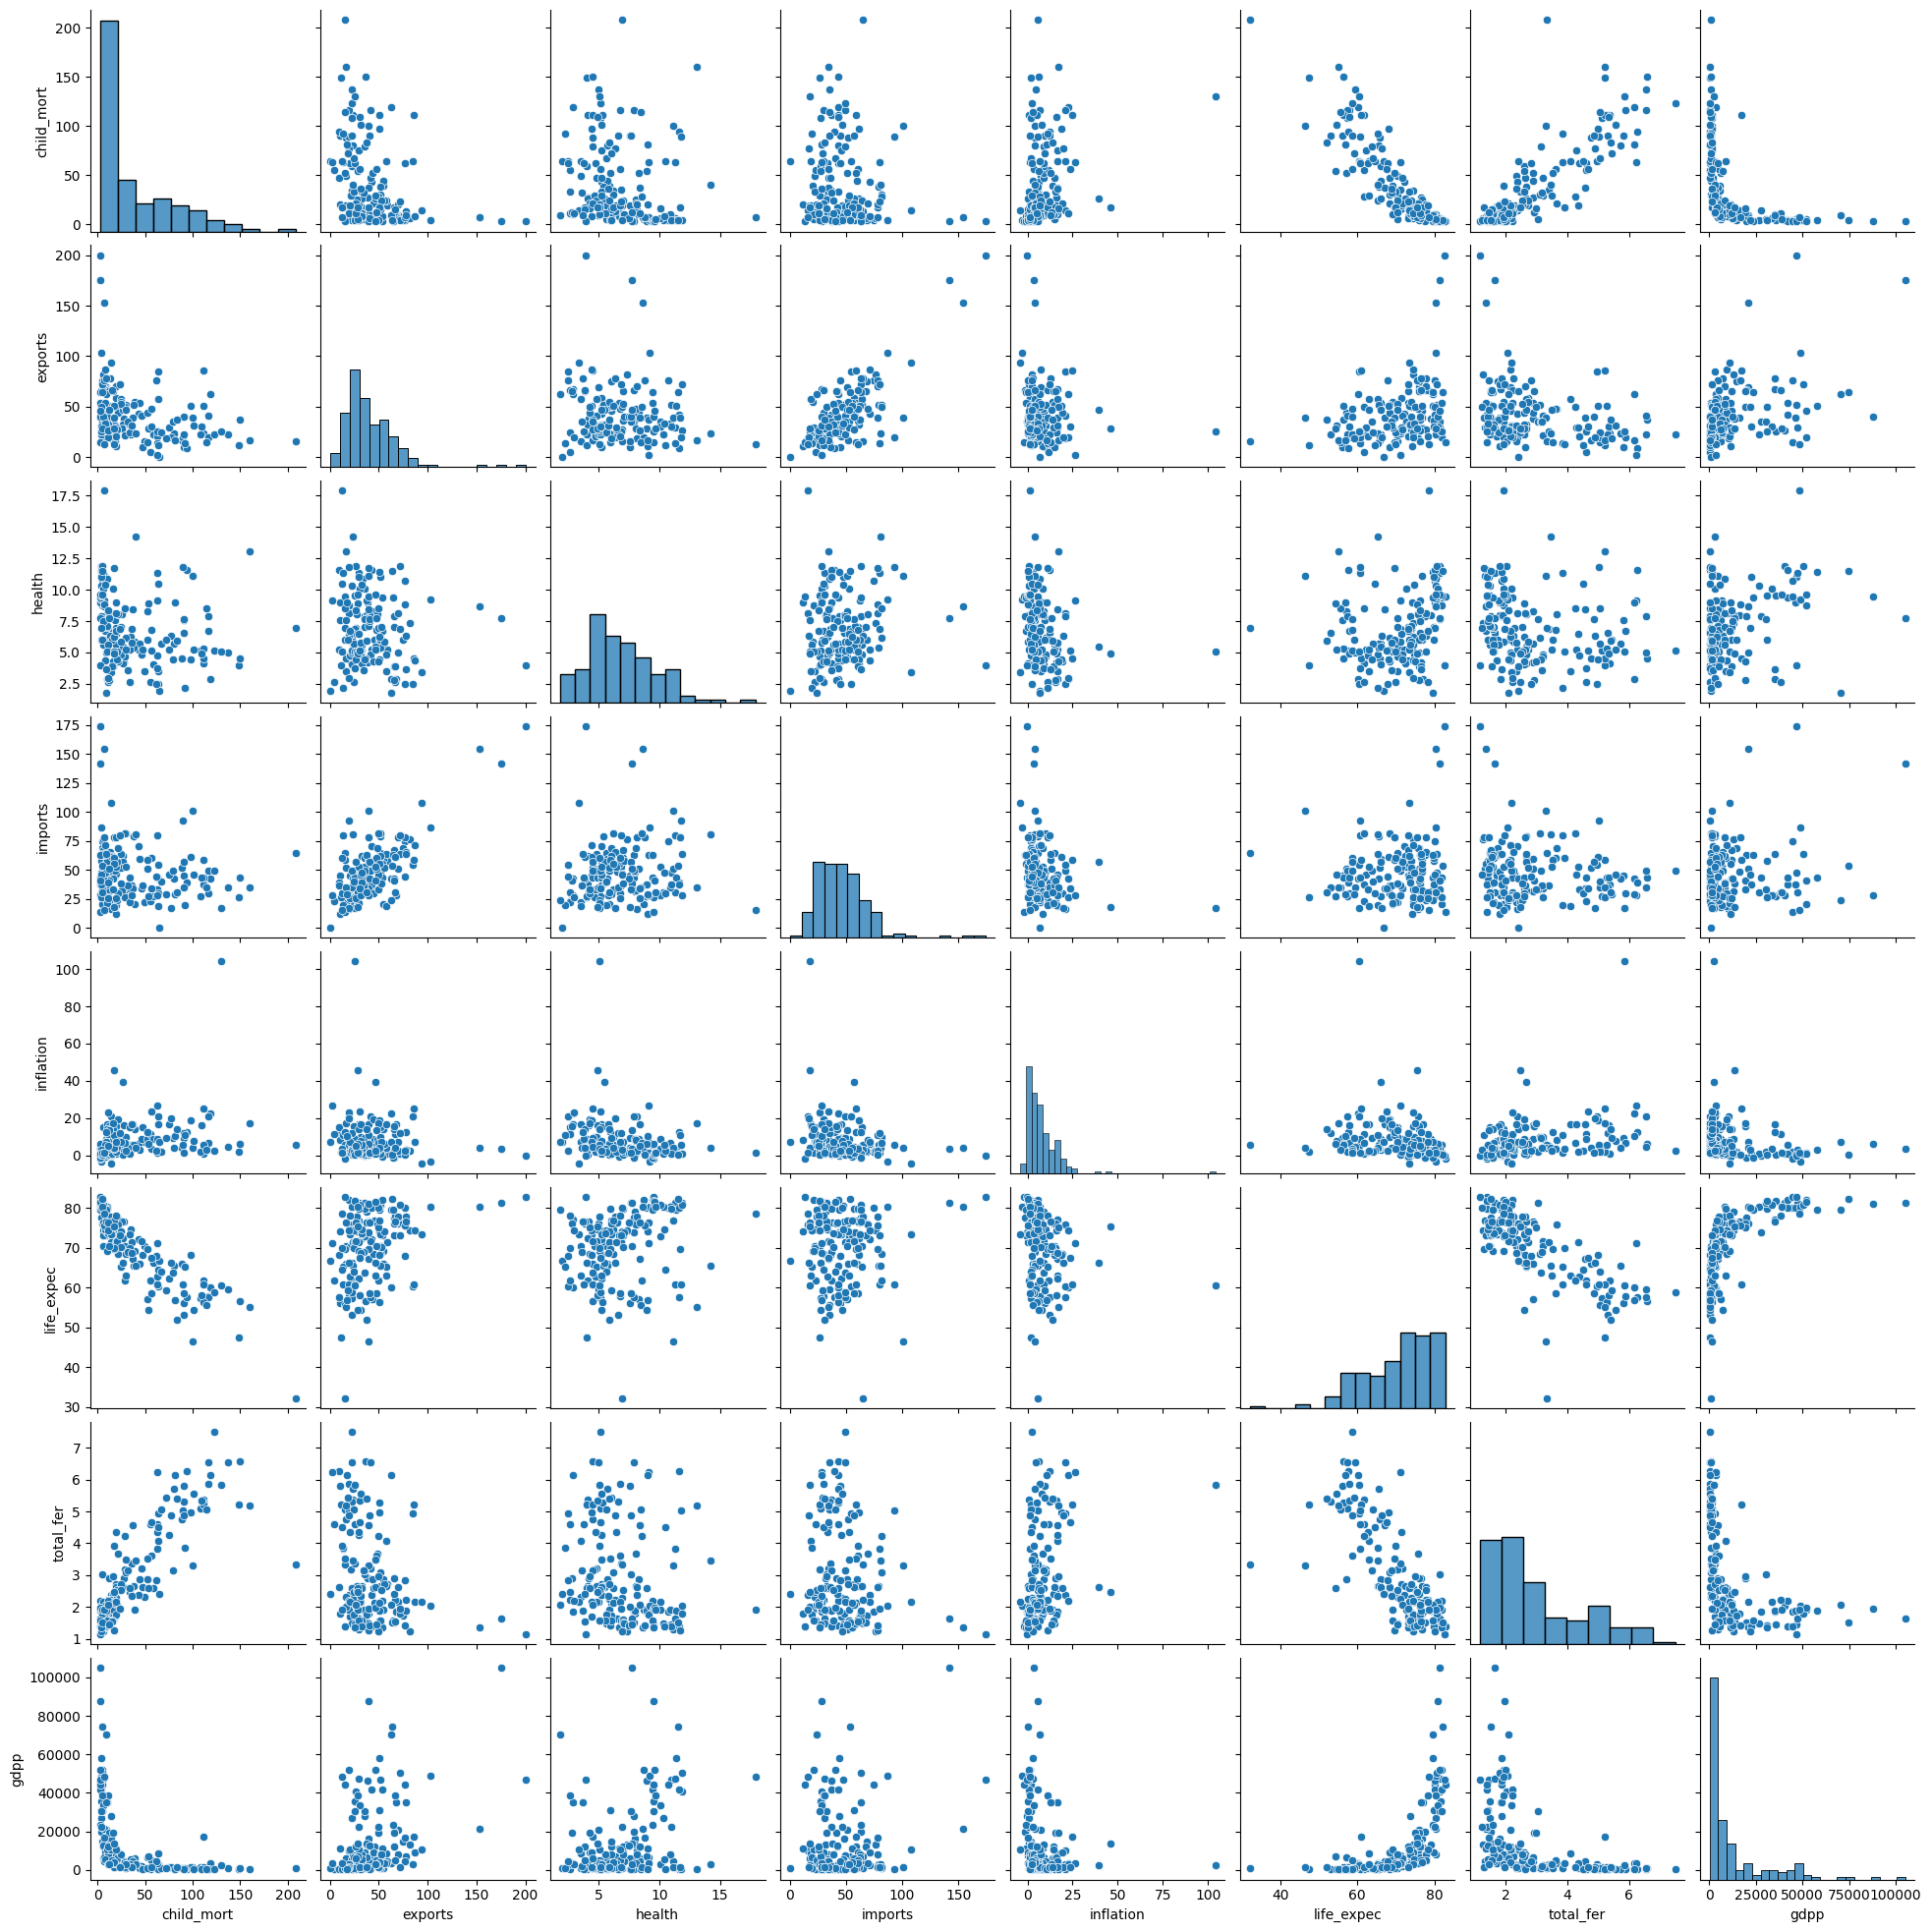

In [157]:
sns.pairplot(data=df.drop('income', axis=1))
plt.show()

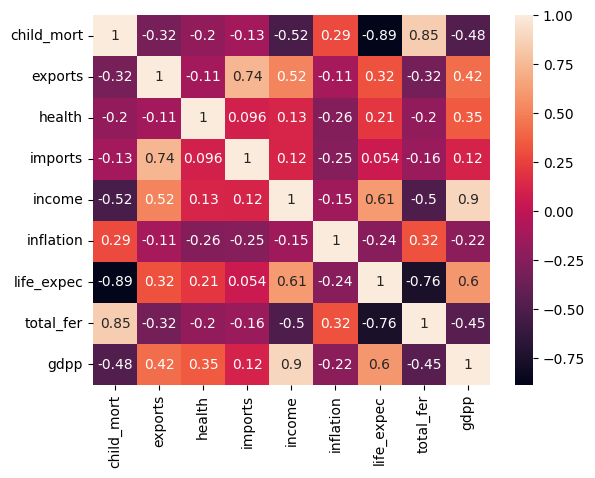

In [158]:
sns.heatmap(df.corr(), annot=True)
plt.show()

[]

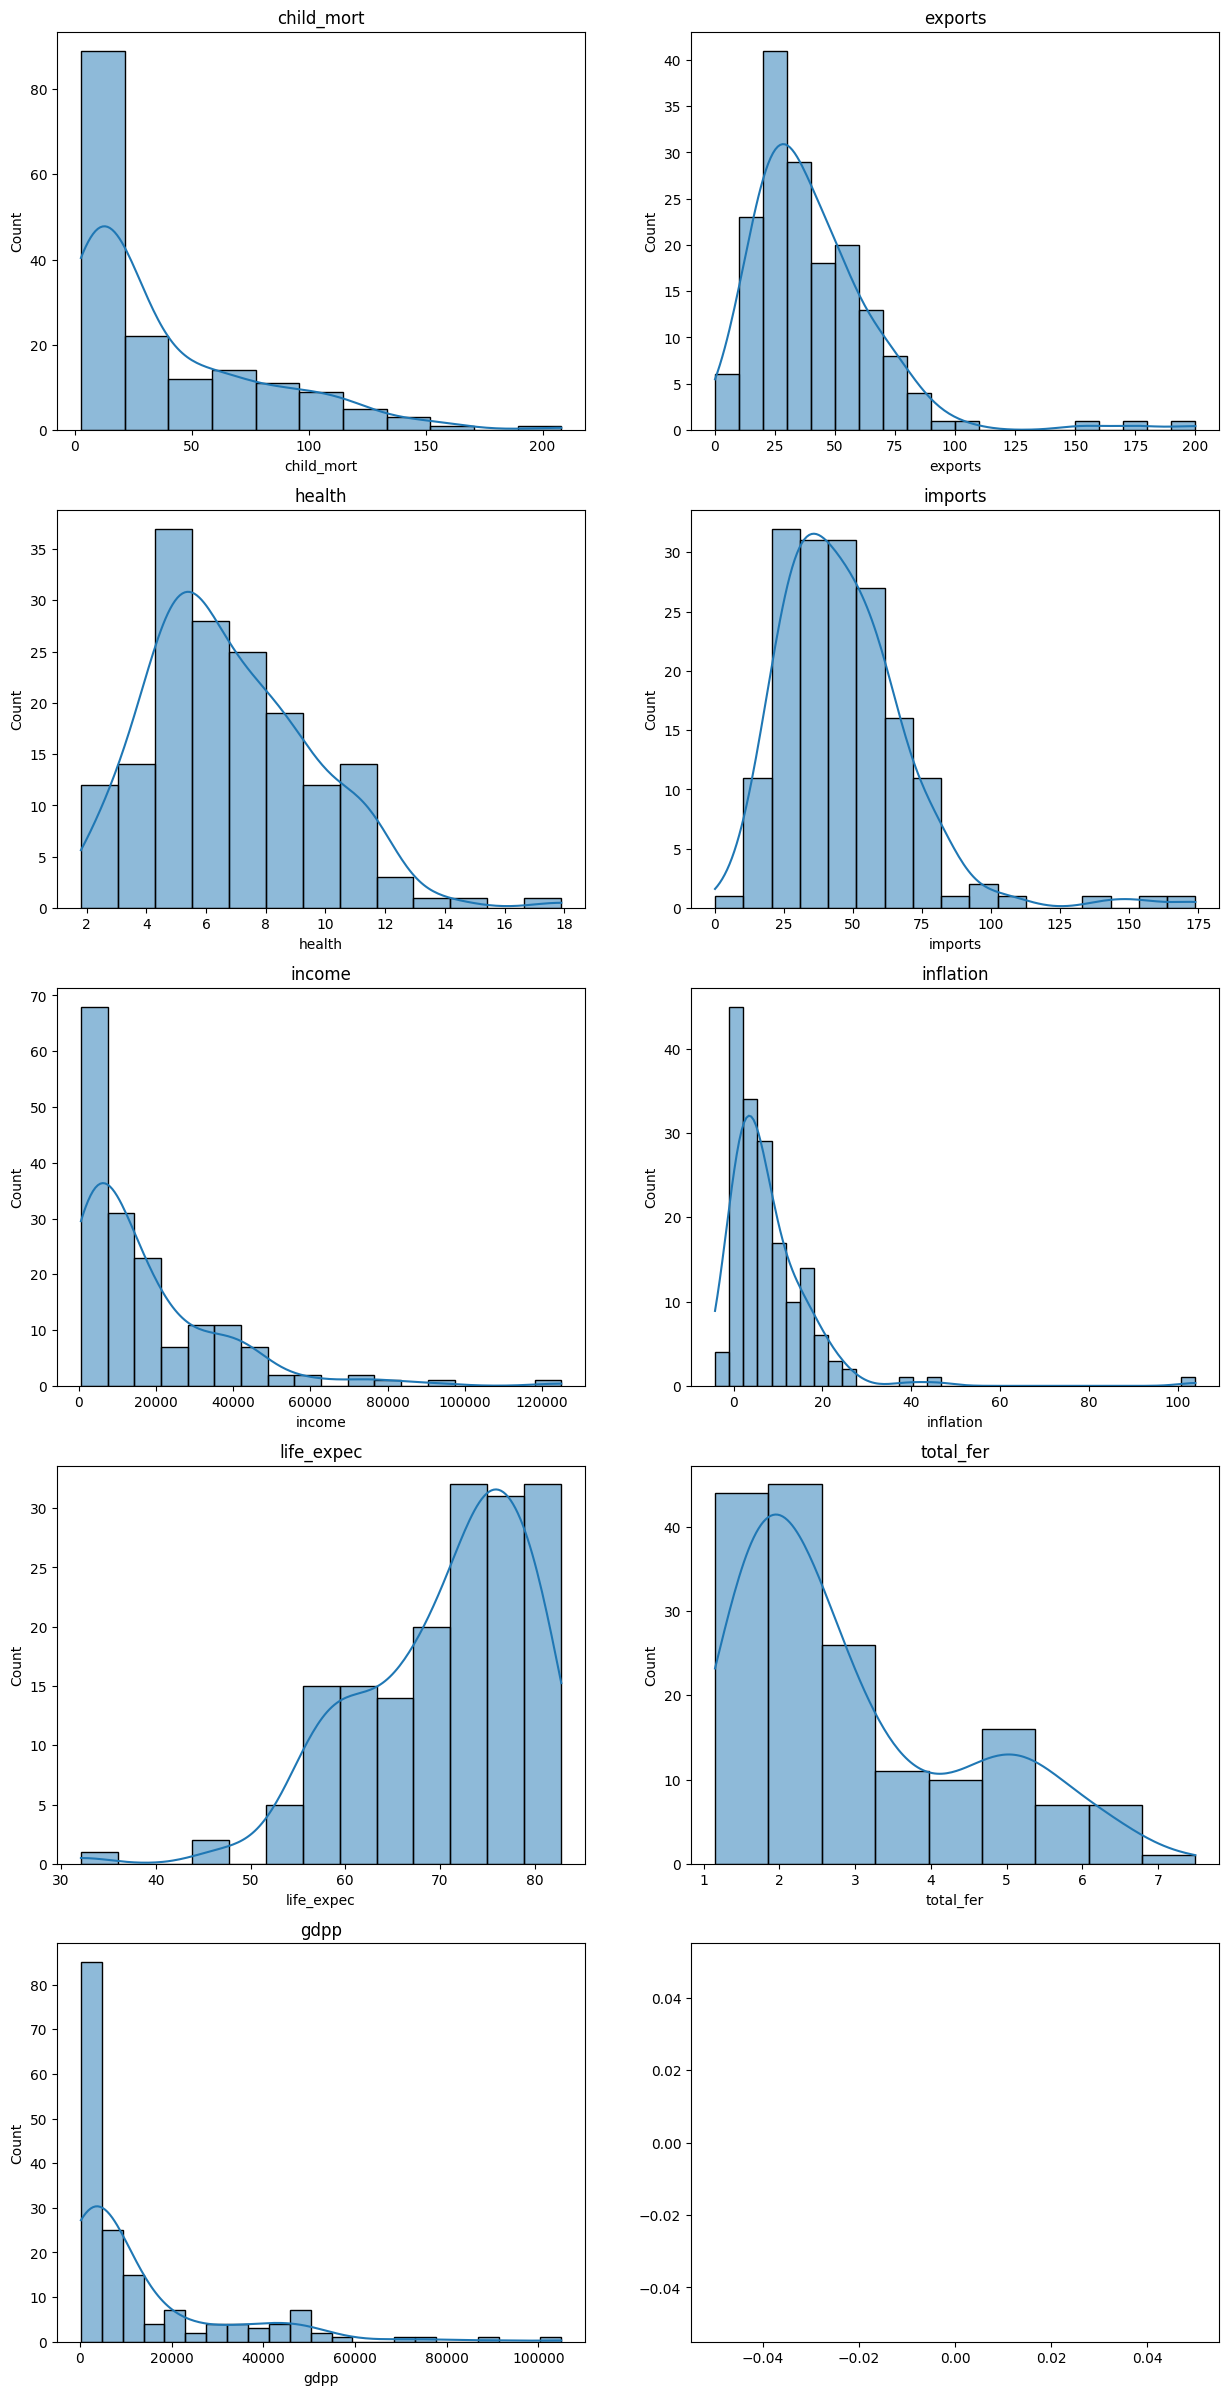

In [159]:
figures, axes = plt.subplots(nrows=m.ceil(len(num_cols)/2), ncols=2, figsize=(15,30))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(col)
plt.plot()

[]

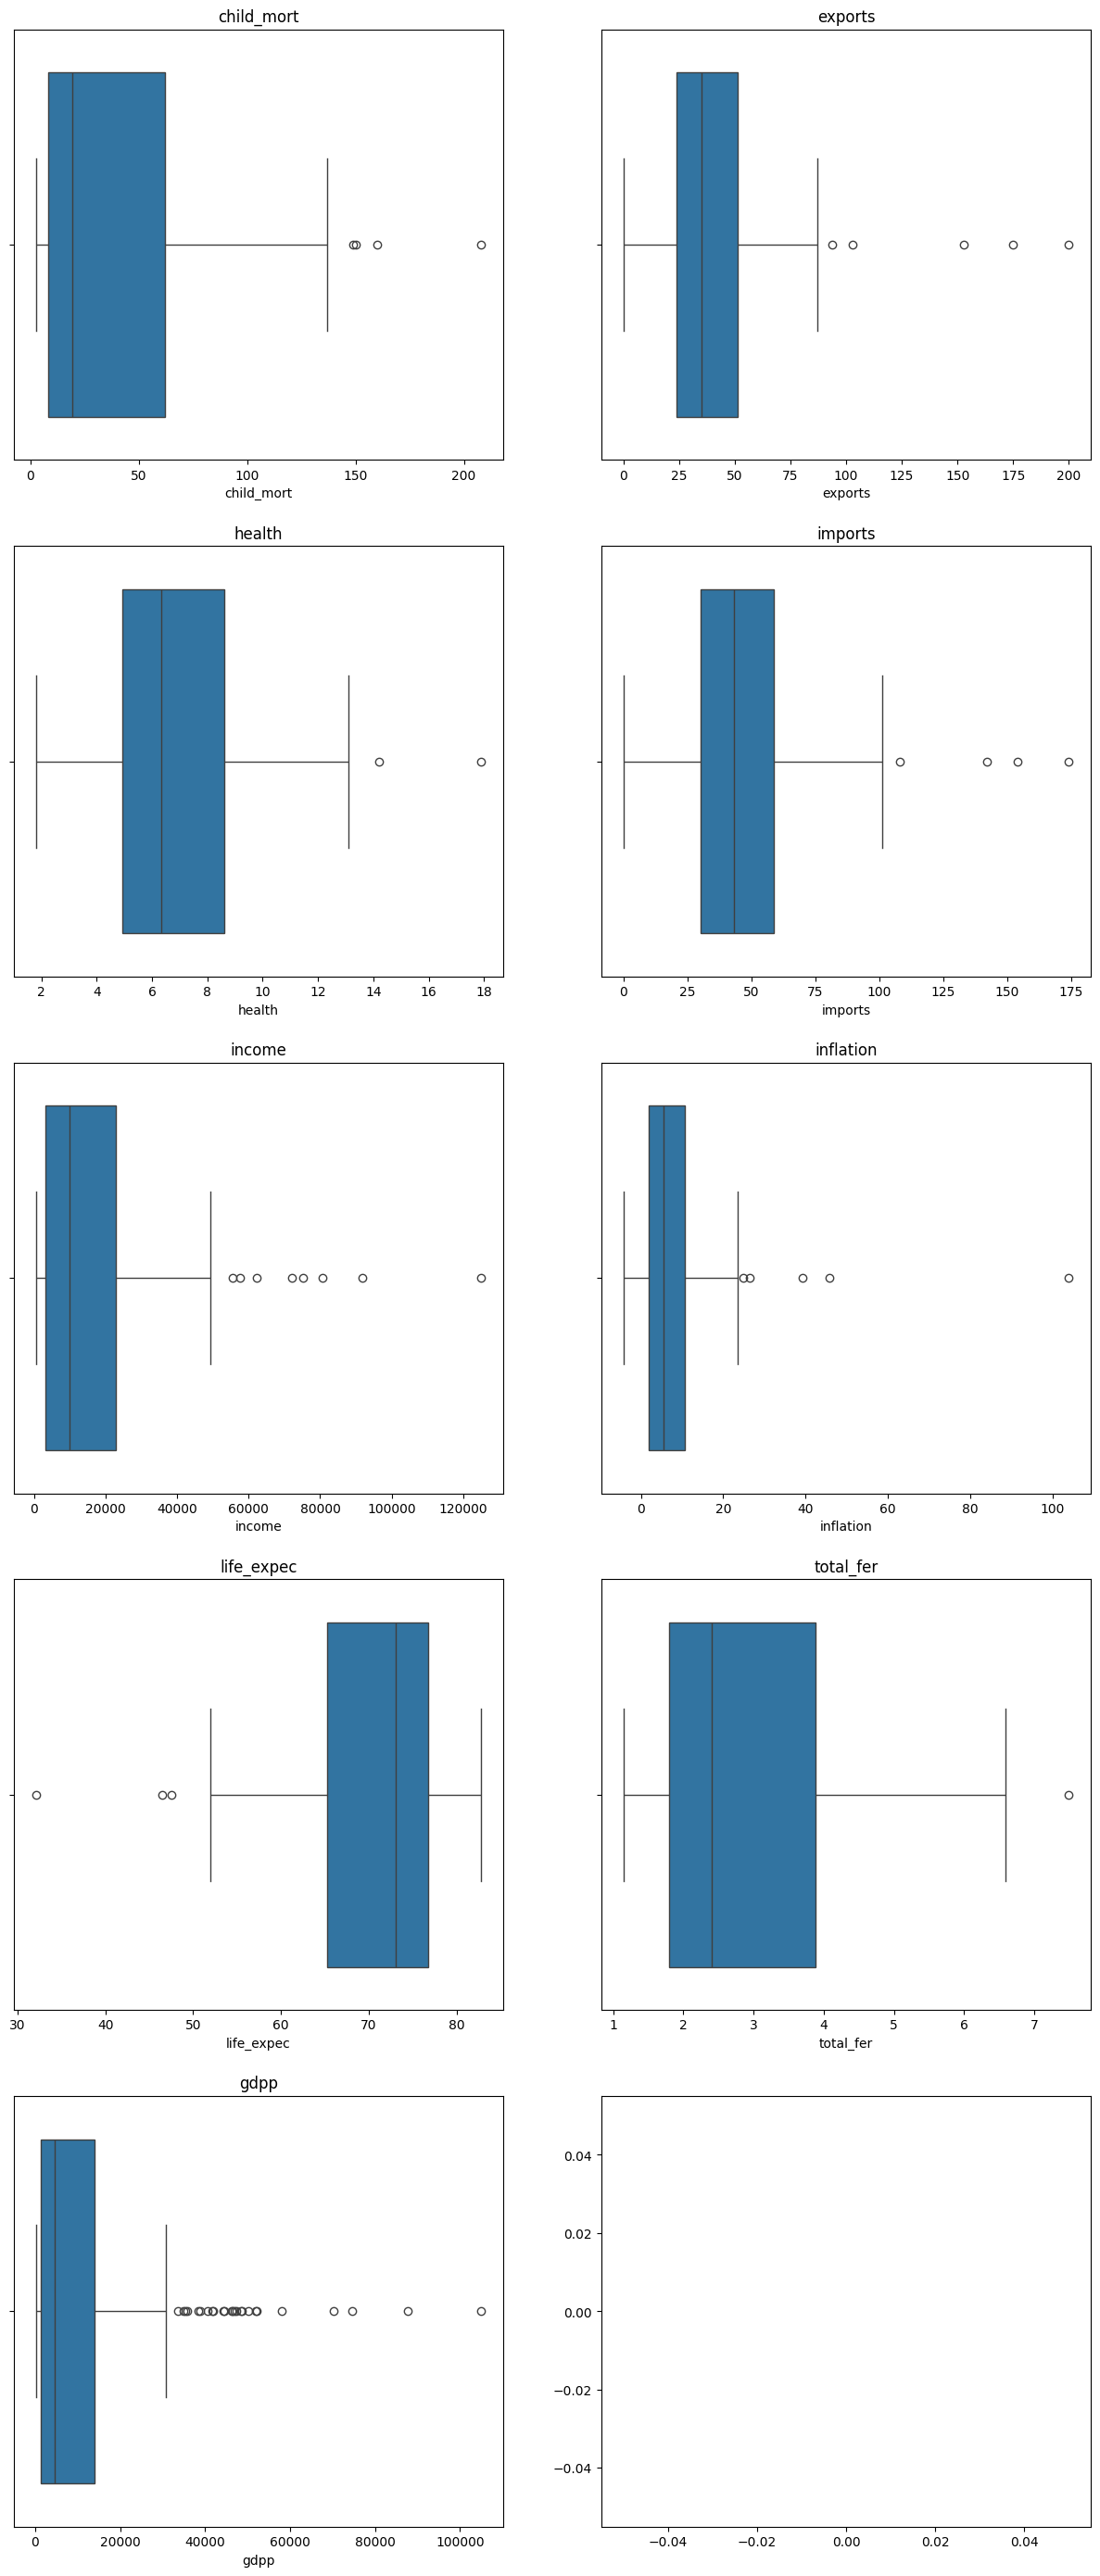

In [160]:
figures, axes = plt.subplots(nrows=m.ceil(len(num_cols)/2), ncols=2, figsize=(15,35))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)
plt.plot()

In [161]:
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"Column:{col:30} Number of rows:{len(df[col]):6} {'':<{5}}Number of outliers:{len(outliers):6}")
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

Column:child_mort                     Number of rows:   167      Number of outliers:     4
Column:exports                        Number of rows:   163      Number of outliers:     5
Column:health                         Number of rows:   158      Number of outliers:     2
Column:imports                        Number of rows:   156      Number of outliers:     1
Column:income                         Number of rows:   155      Number of outliers:     6
Column:inflation                      Number of rows:   149      Number of outliers:     5
Column:life_expec                     Number of rows:   144      Number of outliers:     0
Column:total_fer                      Number of rows:   144      Number of outliers:     1
Column:gdpp                           Number of rows:   143      Number of outliers:    18


In [162]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X = copy.deepcopy(df)
X.iloc[:,:] = scaler.fit_transform(X)
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.365702,-0.837545,0.544828,0.044944,-0.552674,0.383028,-1.313043,1.336100,-0.448191
Albania,-0.154959,-0.187726,0.189655,0.183521,0.121556,-0.184633,0.434783,-0.394191,0.063676
Algeria,0.066116,0.187726,-0.631034,-0.460674,0.362237,1.146789,0.452174,0.120332,0.117221
Angola,1.960744,1.050542,-1.086207,-0.029963,-0.205024,1.869266,-0.973913,1.477178,-0.017366
Antigua and Barbuda,-0.285124,0.444043,0.010345,0.569288,0.864668,-0.534404,0.478261,-0.195021,1.237337


#### k = 3, because we determine under-developing, developing and developed countries(categories).

In [163]:
from sklearn.cluster import KMeans

knn_model = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=101)
knn_model.fit(X)
pred = knn_model.predict(X)

In [164]:
print("Cluster centers: \n",knn_model.cluster_centers_)
print("\nNumber of clusters: ",len(knn_model.cluster_centers_))

Cluster centers: 
 [[ 0.01233408  0.17372279  0.10464995  0.06508909  0.1463214   0.14645712
   0.03162055 -0.07173394  0.19406218]
 [-0.32081142  0.81424352  0.35830721  0.34593122  1.41424783 -0.25494683
   0.456917   -0.31969068  1.87968688]
 [ 1.25307125 -0.27690604 -0.0360671  -0.12282022 -0.4942814   0.42668299
  -0.87990599  0.94426377 -0.39133258]]

Number of clusters:  3


In [165]:
knn_model.labels_

array([2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0,
       2, 0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1,
       0, 2, 1, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 1,
       0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2])

In [190]:
knn_model.inertia_

312.3018339293894

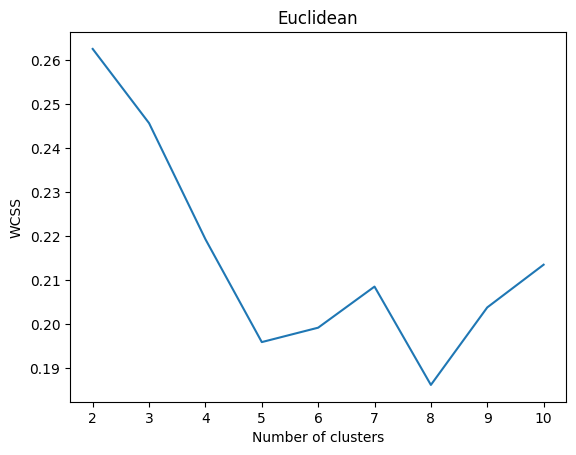

In [191]:
from sklearn.metrics import silhouette_score
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=101)
    kmeans.fit(X)
    wcss.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))
plt.plot(range(2, 11), wcss)
plt.xticks(range(2,11))
plt.title('Euclidean')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [192]:
# Calculate Silhoutte Score
from sklearn.metrics import silhouette_score
score = silhouette_score(X, knn_model.labels_, metric='euclidean')
print('Silhouette score: %.3f' % score)

Silhouette score: 0.246


##### Labels to clusters
##### 0 - developing
##### 1 - developed
##### 2 -under-developing

In [173]:
df_final = copy.deepcopy(df)
df_final['KMeans_labels'] = knn_model.labels_
df_final.head(15)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,2
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0
Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,1


In [175]:
df_final.KMeans_labels.value_counts().reset_index()

,KMeans_labels,count
0,0,66
1,2,37
2,1,22


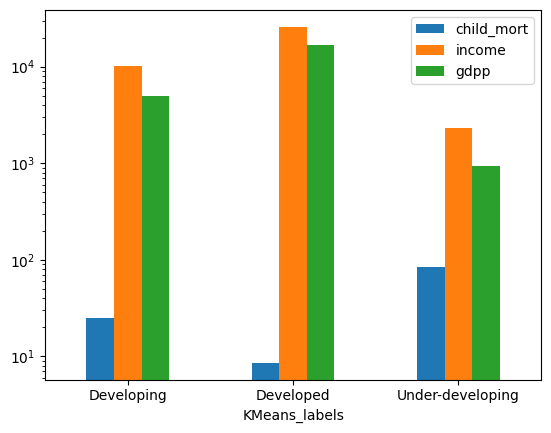

In [176]:
df_final[['child_mort','income','gdpp','KMeans_labels']].groupby('KMeans_labels').mean().plot(kind='bar',logy=True)
plt.xticks([0, 2, 1], ['Developing', 'Under-developing', 'Developed'], rotation=0)
plt.show()

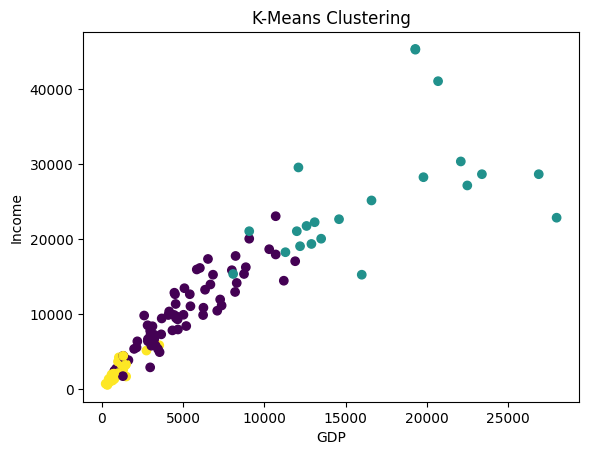

In [177]:
plt.scatter(df_final['gdpp'], df_final['income'], c=df_final['KMeans_labels'], cmap='viridis')
plt.xlabel('GDP')
plt.ylabel('Income')
plt.title('K-Means Clustering')
plt.show()

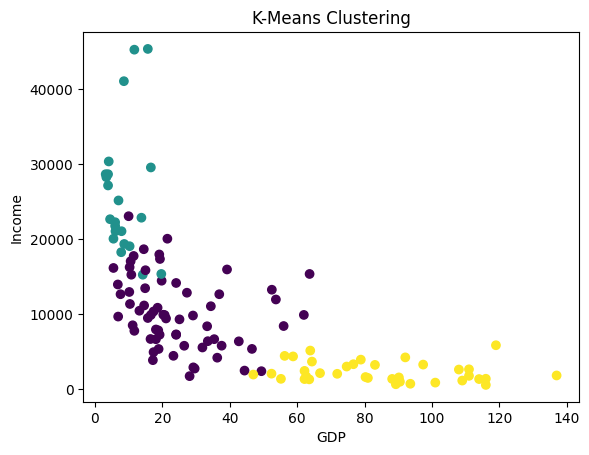

In [178]:
plt.scatter(df_final['child_mort'], df_final['income'], c=df_final['KMeans_labels'], cmap='viridis')
plt.xlabel('GDP')
plt.ylabel('Income')
plt.title('K-Means Clustering')
plt.show()

In [179]:
# Replace factors with names
df_final['KMeans_labels'].replace(to_replace={0:"Developing", 1:"Developed", 2:"Under-developing"}, inplace=True)

In [180]:
df_final.head(15)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,Under-developing
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,Developing
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Developing
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,Under-developing
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,Developed
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,Developing
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,Developing
Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,Developing
Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,Developed


## Hierarchical Agglomerative Clustering

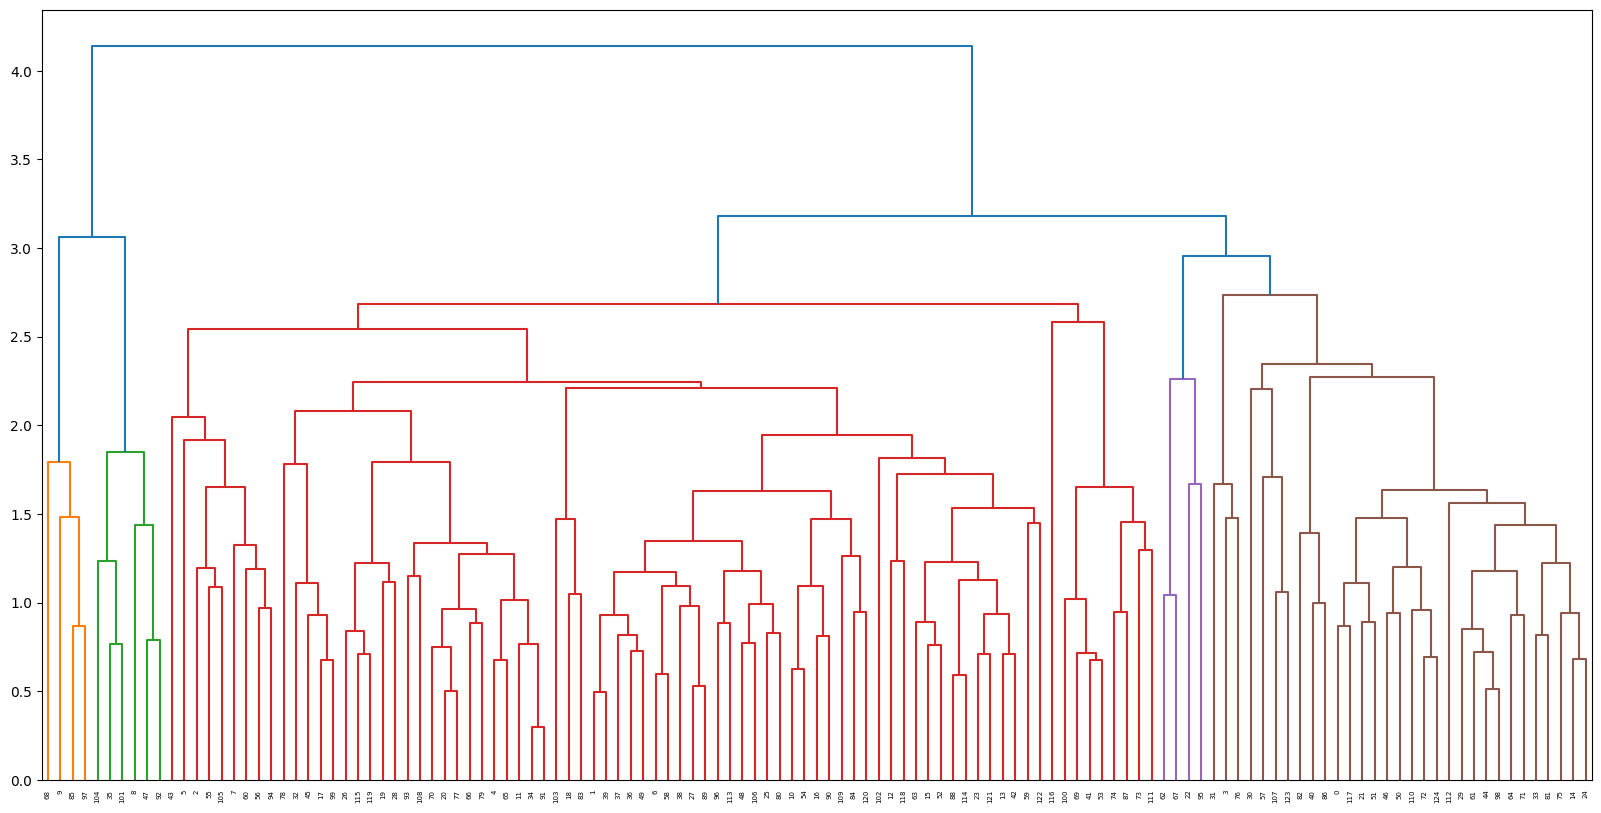

In [183]:
from scipy.cluster import hierarchy
plt.figure(figsize=(20,10))
fig = hierarchy.dendrogram(hierarchy.linkage(y=X, method='average'))
plt.show()

In [184]:
from sklearn.cluster import AgglomerativeClustering

ac_model = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
ac_pred = ac_model.fit_predict(X)

In [185]:
ac_pred

array([0, 2, 0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0,
       0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1,
       1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1,
       2, 2, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0], dtype=int64)

In [186]:
df_final['AgClus_labels'] = ac_pred
df_final.head(15)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_labels,AgClus_labels
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,Under-developing,0
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,Developing,2
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Developing,0
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,Under-developing,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,Developed,1
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,Developing,2
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,Developing,2
Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,Developing,2
Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,Developed,1


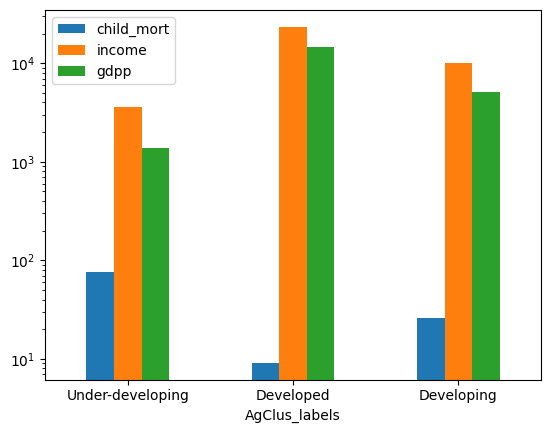

In [187]:
df_final[['child_mort','income','gdpp','AgClus_labels']].groupby('AgClus_labels').mean().plot(kind='bar',logy=True)
plt.xticks([2, 0, 1], ['Developing', 'Under-developing', 'Developed'], rotation=0)
plt.show()

In [188]:
df_final['AgClus_labels'].replace(to_replace={0:"Under-developing", 2:"Developing", 1:"Developed"}, inplace=True)
df_final.head(15)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_labels,AgClus_labels
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,Under-developing,Under-developing
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,Developing,Developing
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Developing,Under-developing
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,Under-developing,Under-developing
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,Developed,Developed
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,Developing,Developing
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,Developing,Developing
Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,Developing,Developing
Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,Developed,Developed


In [189]:
print("Number of different labels:", len(df_final[df_final['AgClus_labels']!=df_final['KMeans_labels']]))
df_final[df_final['AgClus_labels']!=df_final['KMeans_labels']]

Number of different labels: 18


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_labels,AgClus_labels
country,,,,,,,,,,,
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Developing,Under-developing
Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,Developing,Under-developing
Bolivia,46.6,41.2,4.84,34.3,5410,8.780,71.6,3.20,1980,Developing,Under-developing
Bulgaria,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840,Developing,Developed
Chile,8.7,37.7,7.96,31.3,19400,8.960,79.1,1.88,12900,Developed,Developing
Egypt,29.1,21.3,4.66,26.6,9860,10.100,70.5,3.19,2600,Developing,Under-developing
Gabon,63.7,57.7,3.50,18.9,15400,16.600,62.9,4.08,8750,Developing,Under-developing
Indonesia,33.3,24.3,2.61,22.4,8430,15.300,69.9,2.48,3110,Developing,Under-developing
Kiribati,62.7,13.3,11.30,79.9,1730,1.520,60.7,3.84,1490,Under-developing,Developing
